优化问题的概念为解决许多计算问题提供了一种结构化的方法。当你着手解决一个涉及到寻找最大、最小、最多、最少、最快、最便宜等问题时，你就很有可能将这个问题映射到一个经典的、有已知计算解的优化问题上。

一般情况下，优化问题分为两部分:
- 一个要最大化或最小化的**目标函数**。例如，波士顿和伊斯坦布尔之间的机票。
- 一组必须遵守的**约束**(可能为空)。例如，旅行时间的上限。

在本章中，我们介绍了优化问题的概念并给出了一些例子。我们还提供了一些解决它们的简单算法。在第13章中，我们讨论了解决一类重要优化问题的有效方法。
本章的主要内容是：
- 许多真正重要的问题可以用一种简单的方式来表述，从而自然地得出计算解决方案。
- 将看似新的问题简化为众所周知的问题的实例，从而可以使用预先存在的解决方案。
- 背包问题和图形问题是一类问题，通常可以将其他问题归结为这些问题。
- 穷尽枚举算法提供了一种最佳的、简单的搜索解决方案但通常在计算上难以处理。
- 贪心算法通常是一种实用的方法，可以为优化问题找到一个很好但并不总是最佳的解决方案。

像往常一样，我们将用一些`Python`和一些编程技巧来补充有关计算思维的材料。

## 12.1 背包问题
做贼不容易。除了明显的问题（确保房子是空的、撬锁、绕过警报、处理道德困境等），窃贼还必须决定要偷什么。问题是大多数房屋中的贵重物品都比一般窃贼可以带走的要多。一个可怜的窃贼该怎么办？ 他需要找到一组能提供最大价值而又不超出他的承载能力的东西。

例如，假设有一个窃贼闯入房屋并找到如图12.1里的物品列表，他有一个最多可容纳20磅战利品的背包。显然，他不可能把所有东西都装进他的背包里，所以他需要决定带走什么，留下什么。
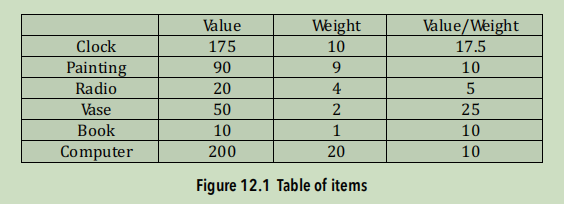

找到这个问题的近似解的最简单方法是使用**贪心算法**。小偷会先选择最好的物品，然后再选择次好的物品，直到他达到极限。当然，在这样做之前，小偷必须决定“最好”应该是什么意思。最好的物品是最有价值的、最轻的，还是价值重量比最高的物品？如果他选择了最高的价值，他会只带着一台电脑，他可以花 200 美元把它围起来。如果他选择最轻的重量，他会按顺序拿走这本书、花瓶、收音机和这幅画——总共价值 170 美元。最后，如果他认为最好意味着最高的价值重量比，他会从花瓶和时钟开始。这将留下价值重量比为 10 的三件物品，但其中只有书仍然可以放入背包。拿完书后，他会拿走剩下的仍然合适的东西，收音机。他的战利品总价值为 255 美元。

尽管密度贪婪（值与权重比）恰好为该数据集产生最佳结果，但不能保证密度贪婪算法总能找到比权重或值贪婪更好的解决方案。更一般地说，不能保证通过贪婪算法找到的这种背包问题的任何解决方案都是最优的。稍后我们将更详细地讨论这个问题。

In [1]:
class Item(object):
    def __init__(self, n, v, w):
        self.name = n
        self.value = v
        self.weight = w
        
    def getName(self):
        return self.name
    
    def getValue(self):
        return self.value
    
    def getWeight(self):
        return self.weight
    
    def __str__(self):
        result = '<'+self.name+', '+str(self.value)\
        +', '+str(self.weight)+'>'
        
        return result

def value(item):
    return item.getValue()

def weightInverse(item):
    return 1.0/item.getWeight()

def density(item):
    return item.getValue()/item.getWeight()

def greedy(items, maxWeight, keyFunction):
    '''
    假设items是一个列表，maxWeight>=0，keyFunction将items的元素映射为数字
    '''
    itemsCopy = sorted(items, key = keyFunction, reverse = True)
    result = []
    totalValue = 0.0
    totalWeight = 0.0
    for i in range(len(itemsCopy)):
        if (totalWeight+itemsCopy[i].getWeight())<=maxWeight:
            result.append(itemsCopy[i])
            totalWeight += itemsCopy[i].getWeight()
            totalValue += itemsCopy[i].getValue()
            
    return (result, totalValue)

这里，定义了一个`Item`类。每个Item对象有`name`、`vlaue`、`weight`属性。

通过引入参数`keyFunction`，我们使`greedy`函数独立于待考虑的列表元素的顺序。 所需要的只是`keyFunction`定义对`items`中元素的排序。然后我们使用这个排序来生成一个跟`items`列表有相同元素的排好序的列表。

注意：这里，我们使用内置的Python函数 `sorted`来做到这一点。我们使用`sorted`而不是`sort`，因为我们想要生成一个新列表而不是改变传递给函数的列表。我们使用`reverse`参数来指示：我们希望列表从最大(相对于`keyFunction`)到最小排序 .

问题：`greedy`算法的复杂度是多少？

答：`O(n*log n)`。有两点需要考虑：内置函数`sorted`函数的时间复杂度，`greedy`函数体里的for循环迭代次数。循环的迭代次数的上界是`items`列表的元素个数，即O(n)，其中n是`items`列表中元素的长度。但是最坏情形下，Python中的内置排序函数的复杂度为`O(n*log n)`，所以的整体的复杂度为`O(n)+O(n*log n)=O(n*log n)`。

In [2]:
def buildItems():
    names = ['clock','painting','radio','vase','book','computer']
    values = [175,90,20,50,10,200]
    weights = [10,9,4,2,1,20]
    Items = []
    
    for i in range(len(values)):
        Items.append(Item(names[i],values[i],weights[i]))
        
    return Items

def testGreedy(items, maxWeight, keyFunction):
    taken, val = greedy(items, maxWeight, keyFunction)
    print('Total value of items taken is', val)
    for item in taken:
        print(' ', item) 
        
def testGreedys(maxWeight = 20):
    items = buildItems()
    print('Use greedy by value to fill knapsack of size', maxWeight)
    testGreedy(items, maxWeight, value)
    print('\nUse greedy by weight to fill knapsack of size', maxWeight)
    testGreedy(items, maxWeight, weightInverse)
    print('\nUse greedy by density to fill knapsack of size', maxWeight)
    testGreedy(items, maxWeight, density)

In [3]:
testGreedys()

Use greedy by value to fill knapsack of size 20
Total value of items taken is 200.0
  <computer, 200, 20>

Use greedy by weight to fill knapsack of size 20
Total value of items taken is 170.0
  <book, 10, 1>
  <vase, 50, 2>
  <radio, 20, 4>
  <painting, 90, 9>

Use greedy by density to fill knapsack of size 20
Total value of items taken is 255.0
  <vase, 50, 2>
  <clock, 175, 10>
  <book, 10, 1>
  <radio, 20, 4>


### 0/1背包问题的一个最优解
假设一个近似解不是足够地好，即我们想要这个问题的最佳可能解。这样的一个解称为**最优解**。不用吃惊，我们正求解一个优化问题。碰巧，窃贼面对的问题是一个典型优化问题的实例，叫做**0/1背包问题**。

0/1背包问题可形式为：
- 每个物品可用一个`<value,weight>`对来表示；
- 背包可容纳总重量不超过`w`的物品；
- 长度为`n`的向量`I`表示可用物品的集合。向量`I`的每个元素是一个物品；
- 长度为`n`的向量`V`用来表示一个物品是否被窃贼拾取。如果`V[i]=1`，则物品`I[i]`被拾取；如果`V[i]=0`，则物品`I[i]`没有被拾取。
- 寻找一个向量`V`，它可以使得$\sum_{i=0}^{n-1}V[i]*I[i].value$最大，并满足约束条件$\sum_{i=0}^{n-1}V[i]*I[i].weight\leq w$。

一种直接的实现思路：
1. 枚举物品的所有可能组合。
2. 移除所有总重超过允许重量的组合。
3. 从剩下的组合中选择价值最大的那个组合。

评价：这种方法一定会找到一个最优解。但是，如果物品的数量很大，那么它将花费很长时间来运行，因为**子集的数量**随着物品数量的增加是极其快速地增长。

In [10]:
def chooseBest(pset, maxWeight, getVal, getWeight):
    bestVal = 0.0
    bestSet = None
    
    for items in pset:
        itemsVal = 0.0
        itemsWeight = 0.0
        
        for item in items:
            itemsVal += getVal(item)
            itemsWeight += getWeight(item)
        
        if itemsWeight <= maxWeight and itemsVal > bestVal:
            bestVal = itemsVal
            bestSet = items
            
    return (bestSet, bestVal)
    
def testBest(maxWeight = 20):
    items = buildItems()
    pset = genPowerset(items)
    taken, val = chooseBest(pset, maxWeight, Item.getValue, Item.getWeight)
    
    print('Total value of items taken is', val)
    for item in taken:
        print(item)


def genPowerset(L):
    """
    假设L是一个列表，
    返回一个由列表组成的列表，它包含了L中所有元素的组合，比如：如果L是[1,2]，那么它将返回一个列表，其元素是[],[1],[2],[1,2]
    """
    powerSet = []
    
    for i in range(0, 2**len(L)):
        binStr = getBinaryRep(i, len(L))
        subSet = []
        for j in range(len(L)):
            if binStr[j] == '1':
                subSet.append(L[j])
        powerSet.append(subSet)
    return powerSet

def getBinaryRep(n, numDigits):
    """
    假设n和numDigits都是非负的ints，
    返回一个长度为numDigits的字符串，它是对n的一个二进制表示字符串
    """
    result = ''
    while(n>0):
        result = str(n%2)+result
        n=n//2
    if len(result)>numDigits:
        raise ValueError('not enough digits')
    for i in range(numDigits-len(result)):
        result = '0'+result
    return result

In [11]:
testBest()

Total value of items taken is 275.0
<clock, 175, 10>
<painting, 90, 9>
<book, 10, 1>


注意：这个解比任何一个贪心算法得到的解都要好。

贪心算法的本质是在每一步做最好的局部选择，即它做的是局部最有解。但是，正如本例所揭示的那样，一系列的**局部最优解**不一定会导致一个**全局最优解**。

问题：`chooseBest`实现的复杂度是多少？

答：`chooseBest`的复杂度是$O(n*2^n)$，其中`n`是`items`的长度。`genPowerset`函数返回一个由列表(是由items组成的列表)组成的列表，这个列表的长度是$2^n$，在它里面的最长的列表的长度是n。因此，`chooseBest`的外部循环将执行$O(2^n)$次，内部循环的执行次数以n为界。

从理论上讲，问题是没希望的。0/1背包问题本质上是关于物品数量指数级的。但是，从实践角度看，这个问题远不是无望的。

尽管并不总能找到最优解，但在实践中经常使用贪心算法。它们通常比保证找到最优解的算法更容易实现和更有效地运行。

背包问题有一个变体，称为分数（或连续）背包问题，贪心算法那保证找到最优解。由于物品是无限可分的，因此尽可能多地取出剩余价值重量比最高的物品是有意义的。例如，假设我们的窃贼在房子里只发现了三样有价值的东西：一袋金粉、一袋银粉和一袋葡萄干。在这种情况下，贪心-密度算法将始终找到最优解。